In [72]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [73]:
df = pd.read_csv('analyze_fourGu_21.csv')

In [74]:
df.sort_values(by='하루평균유동인구_대중교통',inplace=True)

In [77]:
df

,매장명,위도,경도,인접_상가수,인접_학교수,인접_지하철역수,하루평균유동인구_지하철,인접_버스정류장수,하루평균유동인구_버스,하루평균유동인구_대중교통
7,대구팔공산,35.987868,128.636347,19,1,0,0.00,4,31.81,31.81
10,대구동촌유원지,35.880110,128.653159,104,8,0,0.00,3,62.59,62.59
1,대구앞산DT,35.835516,128.579871,152,4,0,0.00,6,73.84,73.84
8,대구봉무,35.921942,128.639708,513,5,0,0.00,2,103.48,103.48
12,대구율하,35.863537,128.693927,219,6,0,0.00,5,110.41,110.41
6,동대구로DT,35.868087,128.627159,299,7,0,0.00,3,163.26,163.26
14,대구테크노폴리스,35.693334,128.459251,226,6,0,0.00,4,169.44,169.44
2,대구가톨릭대학교병원,35.843390,128.567422,161,4,0,0.00,2,207.10,207.10
3,대구평리DT,35.866138,128.555343,297,13,0,0.00,4,548.65,548.65
11,반야월이마트,35.870899,128.727397,172,7,1,7231.25,4,74.93,7306.18


### 시각화 및 분석

In [78]:
from plotnine import *

In [79]:
#한글 폰트
from matplotlib import font_manager, rc
font_path = r'C:\Users\LG\Desktop\exam_pandas\Day_07'+'\malgun.ttf'
font_name= font_manager.FontProperties(fname=font_path).get_name()
rc('font', family = font_name)

In [80]:
p1 = ggplot(df) + geom_bar(aes(x='매장명',y='하루평균유동인구_대중교통',fill = '인접_상가수'),stat='identity') + theme(text=element_text(fontproperties=font_name),axis_text_x=element_text(angle=60, hjust=1)) + geom_hline(yintercept=782.54, linetype='dashed', color='red')

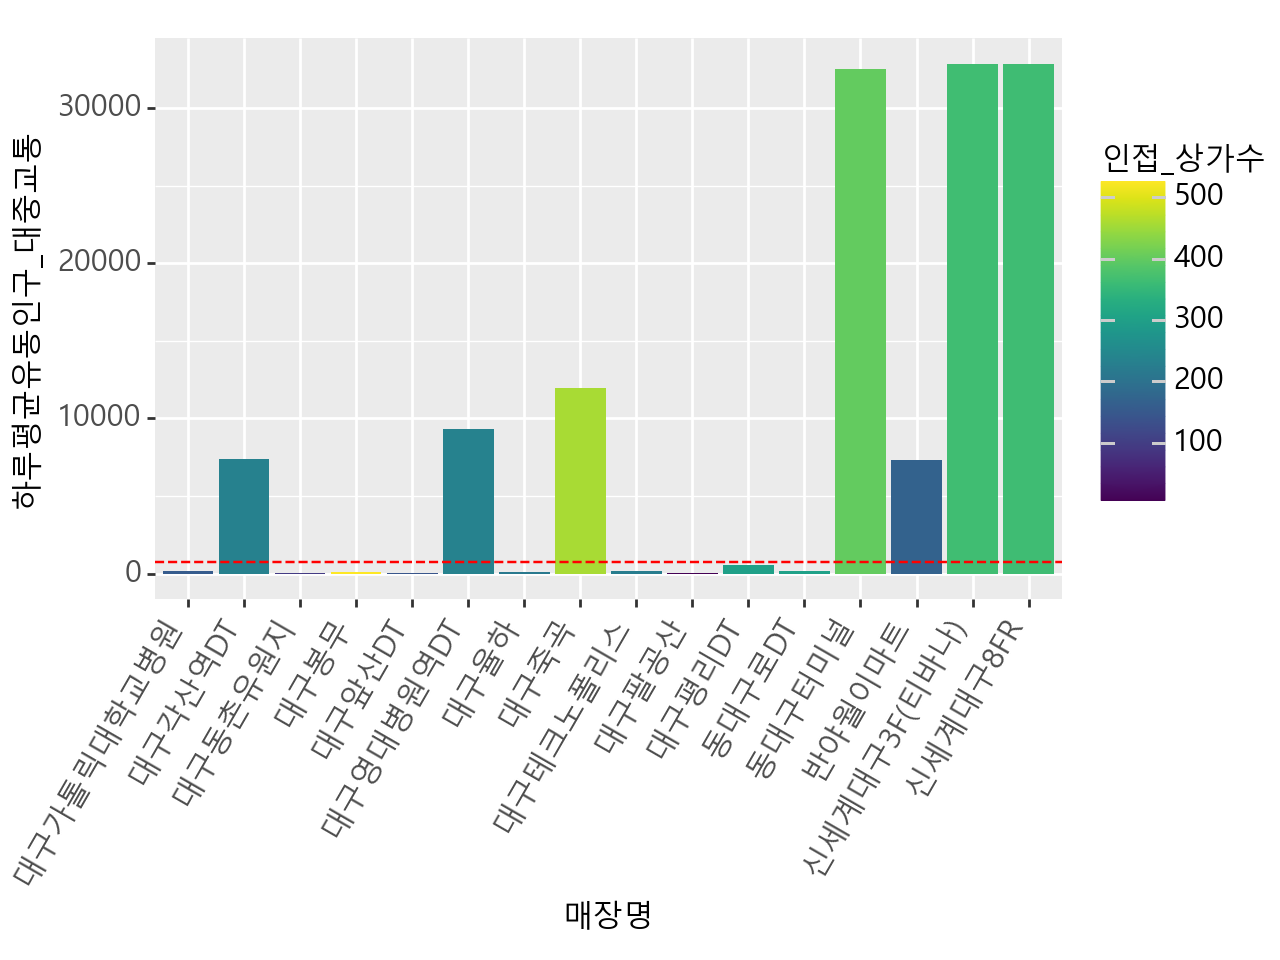

In [81]:
print(p1)

인접 상가 수와 하루평균 유동인구가 많은 곳에도 스타벅스가 들어섰지만 유동인구 적은데 스타벅스가 입지한 곳이 9지점이 있다.(빨간선은 대구 전체 스타벅스의 중앙값)

다른 요인이 뭐가 있을가 생각하니 유동인구가 있어서 유동인구를 그래프에 추가하여 시각화를 하였다.


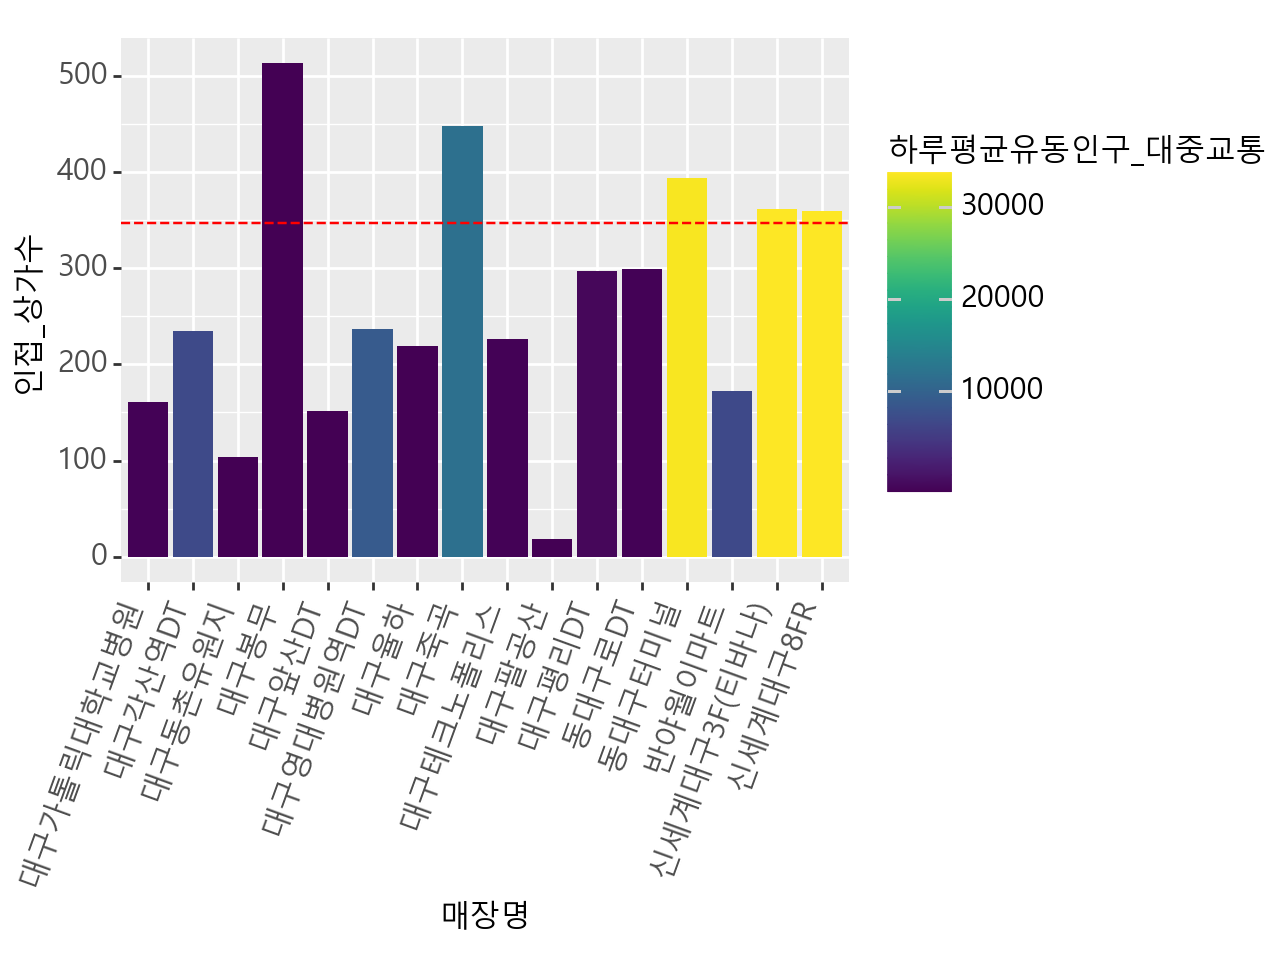

<Figure Size: (640 x 480)>

In [99]:
ggplot(df) + geom_bar(aes(x='매장명',y='인접_상가수',fill='하루평균유동인구_대중교통'),stat='identity') + theme(text=element_text(fontproperties=font_name),axis_text_x=element_text(angle=70, hjust=1))+ geom_hline(yintercept=347, linetype='dashed', color='red')

스타벅스 지점은 인접상가 수가 약 100개 이상인 곳이 대부분이다.

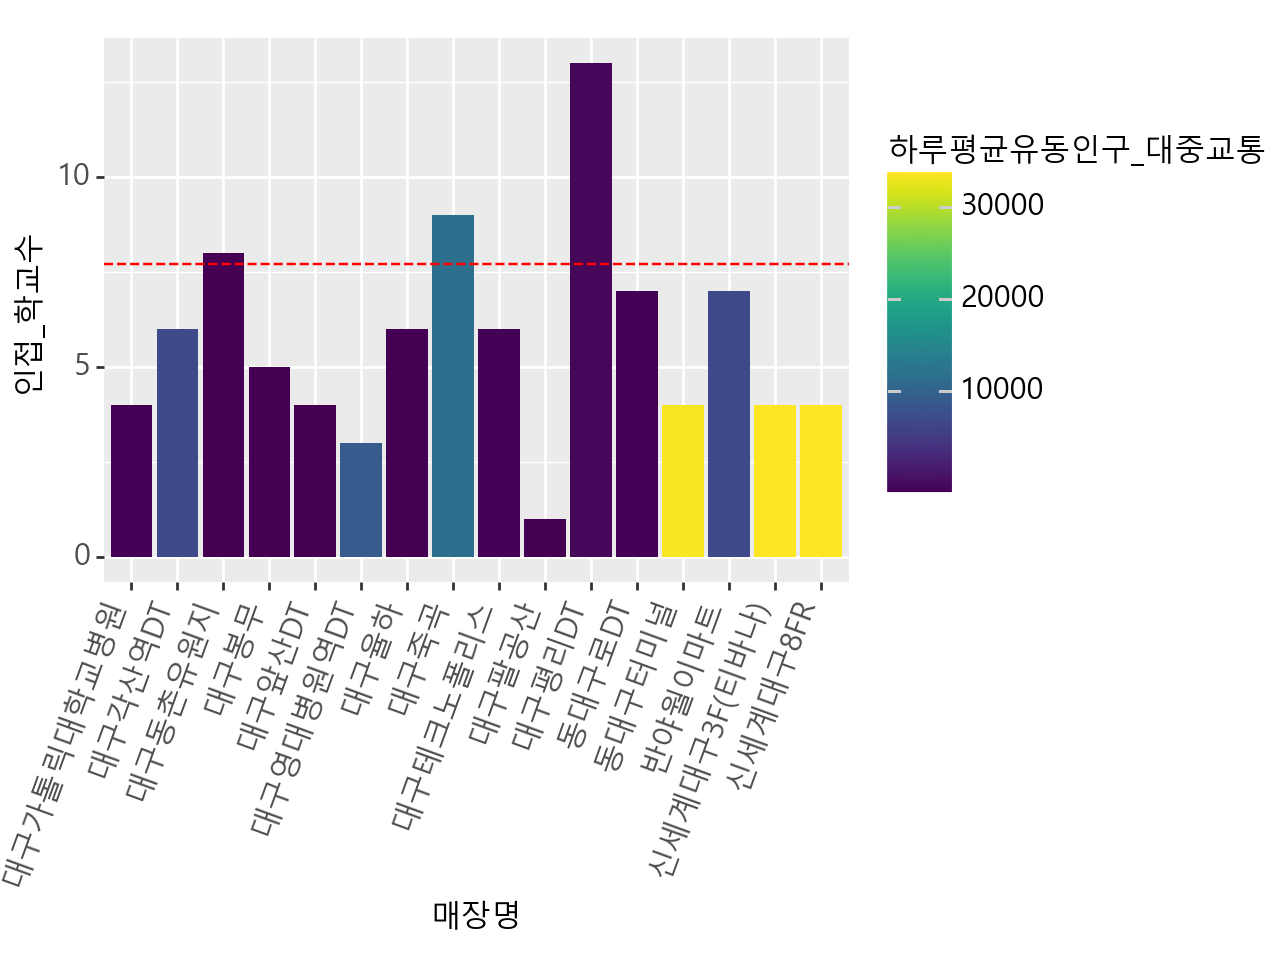

<Figure Size: (640 x 480)>

In [100]:
ggplot(df) + geom_bar(aes(x='매장명',y='인접_학교수',fill='하루평균유동인구_대중교통'),stat='identity') + theme(text=element_text(fontproperties=font_name),axis_text_x=element_text(angle=70, hjust=1)) + geom_hline(yintercept=7.7, linetype='dashed', color='red')

스타벅스는 주변에 상가와 학교가 많은 곳에 들어서는 것 같다.

스타벅스 지점 인접 학교 수를 비교해보니 상가수가 적은 지점이랑 겹친 지점이 있는 것 같다.

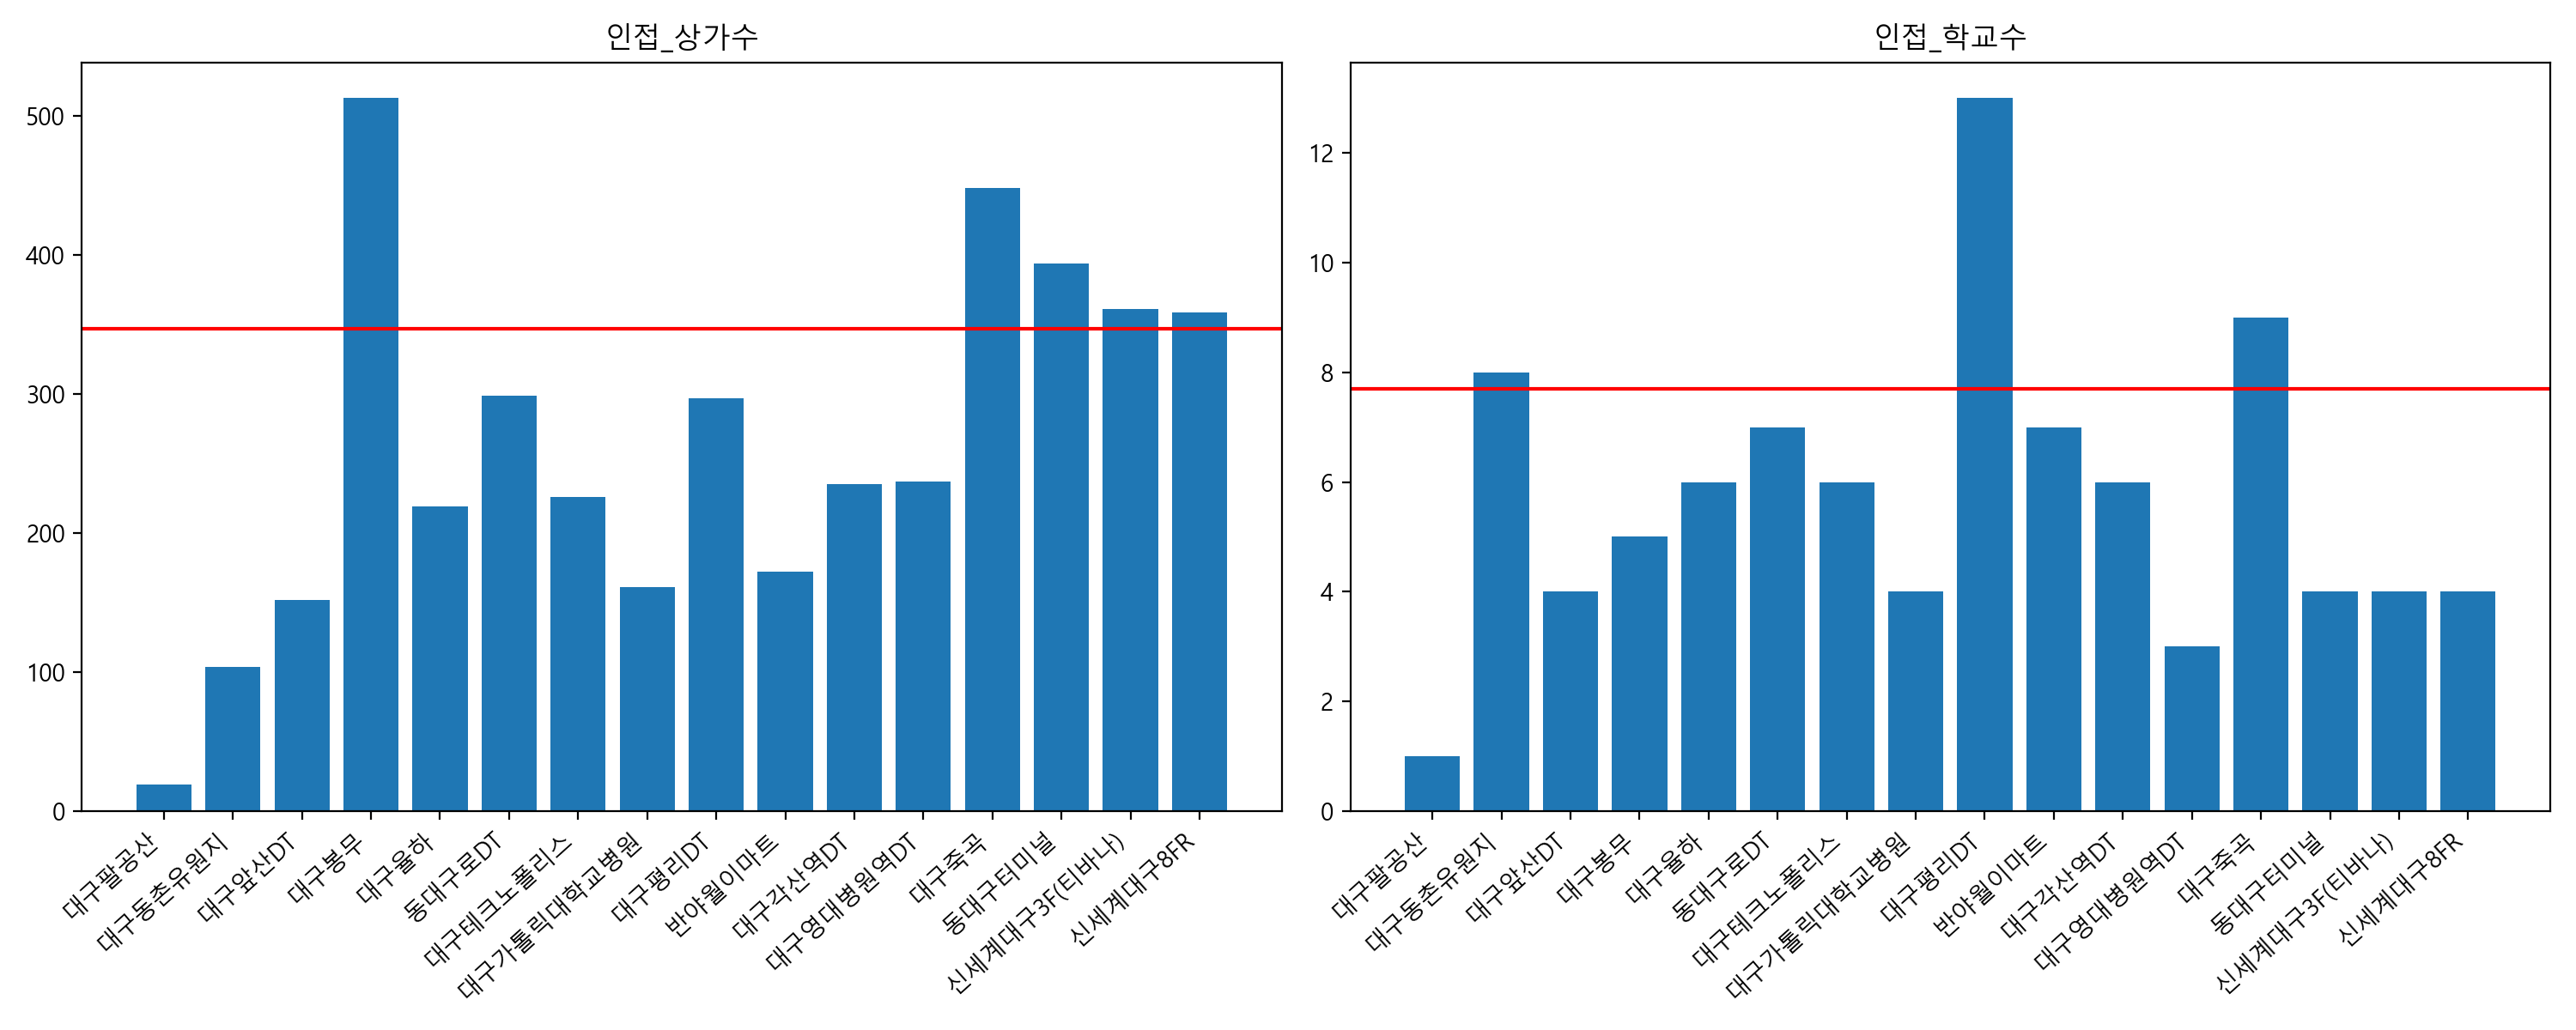

In [84]:
fig, axs = plt.subplots(1,2,figsize= (15,6))
axs[0].bar(df['매장명'],df['인접_상가수'])
axs[1].bar(df['매장명'],df['인접_학교수'])
axs[0].set_xticks(range(len(df['매장명'])))
axs[1].set_xticks(range(len(df['매장명'])))
axs[0].set_xticklabels(df['매장명'].to_list(), rotation=42,ha='right')
axs[1].set_xticklabels(df['매장명'].to_list(), rotation=42,ha='right')
axs[0].set_title('인접_상가수')
axs[1].set_title('인접_학교수')
axs[0].axhline(347,color='red')
axs[1].axhline(7.7,color='red')
fig.tight_layout()
plt.show()

인접 학교 수와 인접 매장이 적은 지점 중 겹치는 매장이 있는지 확인하고, 그 매장을 학교, 매장 수와는 다른 입지 조건이라고 판단한다.
인접 학교 수와 인접 매장수가 적은 스타벅스 매장이 가지고 있는 특징을 찾아본다.

In [85]:
mask = (df['인접_상가수'] <= 347) & (df['인접_학교수'] <= 7.7 ) & (df['하루평균유동인구_대중교통'] < 782.54)

In [86]:
smallDF=df[mask]
smallDF

,매장명,위도,경도,인접_상가수,인접_학교수,인접_지하철역수,하루평균유동인구_지하철,인접_버스정류장수,하루평균유동인구_버스,하루평균유동인구_대중교통
7,대구팔공산,35.987868,128.636347,19,1,0,0.0,4,31.81,31.81
1,대구앞산DT,35.835516,128.579871,152,4,0,0.0,6,73.84,73.84
12,대구율하,35.863537,128.693927,219,6,0,0.0,5,110.41,110.41
6,동대구로DT,35.868087,128.627159,299,7,0,0.0,3,163.26,163.26
14,대구테크노폴리스,35.693334,128.459251,226,6,0,0.0,4,169.44,169.44
2,대구가톨릭대학교병원,35.843390,128.567422,161,4,0,0.0,2,207.10,207.10


대구팔공산, 대구앞산DT, 대구카톡릭대학교병원, 대구율하, 동대로DT, 대구테크노폴리스 스타벅스 지점의 입지조건을 따로 알아본다.

- 대구 팔공산 : 관광객이나 자연과 아름다운 조화를 목적으로 입지한 것으로 보인다. 대구관광코스로도 공공데이터포털에 올라와있다.

In [87]:
#공공데이터 대구광역시_관광코스
palgong = pd.read_csv('대구광역시_관광코스 정보_20210906.csv',encoding='cp949')

In [88]:
palgong[palgong['코스 주제'] == '팔공산'][['코스타이틀','지역','관광지']]

,코스타이틀,지역,관광지
29,팔공산 힐링,동구,갓바위
30,팔공산 힐링,동구,아양기찻길
31,팔공산 힐링,동구,동화사
32,팔공산 힐링,동구,방짜유기박물관
33,팔공산 힐링,동구,시민안전테마파크
34,팔공산 힐링,동구,동화사 템플스테이
35,팔공산 힐링,동구,팔공산 단풍축제


- 대구앞산DT: 지점 위치가 앞산 카페거리에 있다. 카페거리에 카페와 음식점 등이 몰려있기 때문에 스타벅스가 들어온것으로 보인다.

In [89]:
apsan = pd.read_csv('download.csv')

In [90]:
apsan

,업체명,소재지,전화번호,주메뉴
0,료미(대구앞산점),"대구광역시 남구 현충로 17, 2층 (대명동)",0507-1400-5188,경양식
1,올리버브라운 대구앞산카페거리점,"대구광역시 남구 현충로 17, 3층 (대명동)",0507-1304-8192,커피숍
2,지오네키친,"대구광역시 남구 현충로 21, 1층 (대명동)",053-426-3992,경양식
3,투썸플레이스대구앞산점,"대구광역시 남구 현충로 24 (대명동, (1~2층))",053-656-9266,커피숍
4,스타벅스대구앞산DT점,"대구광역시 남구 현충로 32, 1-2층 (대명동)",053-623-3746,커피숍
...,...,...,...,...
61,파스쿠찌 대구앞산점,"대구광역시 남구 대명남로 191, 1,2층 (대명동)",053-657-6007,커피숍
62,도깨비나무,"대구광역시 남구 대명남로 193, 2층 (대명동)",053-655-2231,한식
63,오어앤,"대구광역시 남구 안골길 49-1, 1층 (대명동)",0507-1303-9844,커피숍
64,로더바이미(L'odeur by me),"대구광역시 남구 안골길 56, 1층 (대명동)",0507-1336-2821,커피숍


- 대구카톨릭대학교병원: 병원이라는 특수한 건물에 입지하였다. 이는 서울을 비롯한 다른지역에도 입지한 예가 많다.

In [91]:
hospital = pd.read_excel('스타벅스매장주소(20191029).xlsx')

In [92]:
hospital[hospital.지점명.str.contains('병원')]

,지점명,주소,전화번호,시도,시군구,동
24,을지병원사거리,"서울특별시 강남구 논현로 752 (논현동,구산빌딩)",02-758-8896,서울특별시,강남구,논현동
62,차병원사거리,"서울특별시 강남구 봉은사로 213, 센트럴타워 (논현동)",02-758-8444,서울특별시,강남구,논현동
729,구월길병원,"인천광역시 남동구 남동대로 773, , 14 삼성화재 인천사옥 (구월동)",032-438-7283,인천광역시,남동구,구월동
780,대전건양대병원,대전광역시 서구 관저동로 170 (관저동)1층,042-542-3634,대전광역시,서구,관저동
818,계명대동산병원,대구광역시 달서구 달구벌대로 1035 (신당동),053-584-3740,대구광역시,달서구,신당동
996,삼성창원병원,경상남도 창원시 마산회원구 팔용로 158 (합성동),055-253-3285,경상남도,창원시마산회원구,합성동
1063,동국대일산병원,경기도 고양시 일산동구 동국로 27,031-961-9180,경기도,고양시일산동구,식사동
1135,분당서울대병원4,"경기도 성남시 분당구 구미로173번길 82, 분당서울대학교병원 신관 4층 (구미동)",031-716-6583,경기도,성남시분당구,구미동
1136,분당서울대병원1,"경기도 성남시 분당구 구미로173번길 82, 분당서울대학교병원 신관 1층 (구미동)",031-715-6581,경기도,성남시분당구,구미동


-  대구율하: 주변에 아파트 단지가 형성되어있어서 도보로 이용하는것 같음

In [93]:
ulha = pd.read_csv('대구광역시 동구_아파트 현황_20221213.csv',encoding='cp949')

In [94]:
ulha[ulha.주소.str.contains('율하')]

,연번,아파트명,주소,동수,층수,세대수,입주년도
30,31,율하 뜨란채,대구광역시 동구 율하동로 67,11,5,332,1997
31,32,대구안심4단지,대구광역시 동구 율하동로 73,6,5,194,2003
32,33,화성아파트,대구광역시 동구 율하동로20길 20,9,5,448,1990
33,34,신기모란2차아파트,대구광역시 동구 율하동로20길 30,5,5,375,1988
34,35,신기모란3차아파트,대구광역시 동구 율하동로20길 31,11,5,640,1988
35,36,신기모란아파트,대구광역시 동구 율하동로20길 40,5,5,320,1987
75,76,안심주공 3단지,대구광역시 동구 율하동로 76,17,6,984,1994
116,117,신기메디오스,대구광역시 동구 율하동로28길 54,1,12,73,2004
164,165,율하리버파크,대구광역시 동구 율하동로 19,12,15,486,2009
165,166,율하휴먼시아10단지,대구광역시 동구 율하동로8길 16,16,15,976,2010


In [95]:
tech = pd.read_csv('대구광역시 달성군_기업체 현황_20211112.csv',encoding='cp949')

In [96]:
tech[tech.소재지주소.str.contains('테크노')]

,업체명,소재지주소,생산품목,대표자,종업원수(명),구분,위도,경도
35,㈜베사,대구 달성군 현풍읍 테크노대로2길 40,세라믹전자부품,신영철,350,현풍면,35.686091,128.447889
37,금오이엠에스,대구 달성군 현풍읍 테크노대로4길 46,버너 헤드 등,구자근,114,현풍면,35.687346,128.450494
40,경창산업(주),대구 달성군 유가읍 테크노순환로1길 57,오토 트랜스미션,손일호,250,유가면,35.677635,128.447370
43,㈜스맥,대구 달성군 유가읍 테크노대로6길 43,전자응용공작기계,원종범,215,유가면,35.684904,128.467021
44,대영코어텍㈜,대구 달성군 유가읍 테크노순환로8길 8,볼스크류,정태호,189,유가면,35.680113,128.465760
45,삼금공업(주),대구 달성군 유가읍 테크노순환로8길 41,자동차 엔진 부품,김훈,132,유가면,35.682167,128.468042
46,현대로보틱스㈜,대구 달성군 유가읍 테크노순환로3길 50,"산업용 로봇, 클린 로봇",윤중근,276,유가면,35.679718,128.456354


동대구로 DT는 예전 mbc네거리에 위치하고 주변에 아파트입주예정이 많은 지역에 위치하였고, 웨딩홀과 세무서가 있다.